## Overlap between our set and their set

In [1]:
'Assuming we are in base dir so cwd/ contains data files'

import numpy as np
their_training = np.loadtxt("cwd/Lindel_training.txt", delimiter="\t", dtype=str)
their_test = np.loadtxt('cwd/Lindel_test.txt', delimiter="\t", dtype=str)
theirs = np.vstack((their_test, their_training))

our_training = np.loadtxt("cwd/Our_Lindel_training.txt", delimiter="\t", dtype=str)
our_test = np.loadtxt("cwd/Our_Lindel_test.txt", delimiter="\t", dtype=str)
ours = np.vstack((our_training, our_test))

their_seqs = theirs[:, 0]
their_data = theirs[:, 1:].astype('float32')

our_seqs = ours[:, 0]
our_data = ours[:, 1:].astype('float32')

our_miss = 0
their_miss = 0
for seq in their_seqs:
    if seq not in our_seqs:
        our_miss += 1

for seq in our_seqs:
    if seq not in their_seqs:
        their_miss += 1


There are 310 entries in their 4790 that are not in 4854 of ours
There are 374 entries in our 4854 that are not in 4790 of theirs


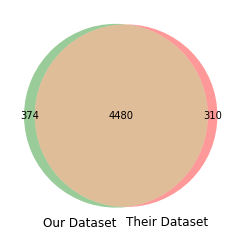

In [2]:
# Histogram MSE their vs our
# Histogram ABS err vs our
# Bar plot 20 base pairs van x % 20 frameshift probability prediction
print(f'There are {our_miss} entries in their {len(their_seqs)} that are not in {len(our_seqs)} of ours')
print(f'There are {their_miss} entries in our {len(our_seqs)} that are not in {len(their_seqs)} of theirs')

from matplotlib_venn import venn2
import matplotlib.pyplot as plt
figure, axes = plt.subplots(1, 1)
intersection = len(their_seqs) - our_miss

venn2(subsets={'10': their_miss, '01': our_miss, '11': intersection,}, set_labels = ('Our Dataset', 'Their Dataset'), set_colors=('green', 'red'))
plt.show()

In [3]:
errors = []
mses = []
for ti, seq in enumerate(their_seqs):
    their_profile = their_data[ti, 3034:]
    oi = np.where(our_seqs == seq)
    if len(oi[0]) == 0:
        continue
        
    our_profile = our_data[oi[0], 3034:][0]
    error = 0
    for y in range(len(their_profile)):
        abs_error_h = abs(their_profile[y] - our_profile[y])
        error += abs_error_h
    errors.append(error)
    mses.append((error ** 2) / len(their_profile))

errors.sort()
mses.sort()
print(f'10 absolute outliers have absolute errors of: \n{errors[-10:]}\n')
print(f'10 mse based outliers have mses of: {mses[-10:]}')

10 absolute outliers have absolute errors of: 
[1.761904782615602, 1.7890909116249532, 1.8225806131958961, 1.8307692939415574, 1.8421052619814873, 1.8484848886728287, 1.88235301990062, 1.9305555601604283, 1.9411764685064554, 1.9733333848416805]

10 mse based outliers have mses of: [0.005583288602524697, 0.00575691778787591, 0.005974460596398433, 0.006028266560502282, 0.00610315071262569, 0.00614549709289892, 0.006372756999152848, 0.006703317933212851, 0.006777277125689198, 0.007003677423976123]


50 outliers


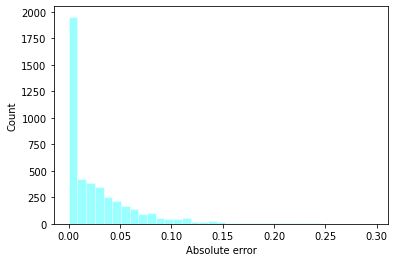

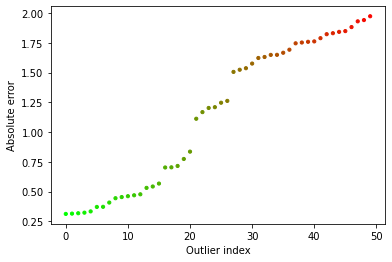

In [54]:
outlier_count = len(list(filter(lambda x: x > .3, errors)))
print(f'{outlier_count} outliers')

plt.hist(errors[:-outlier_count], bins=35, color='aqua', alpha=.4, edgecolor=(1.0, 1.0, 1.0, 0.1))
plt.ylabel("Count")
plt.xlabel("Absolute error")
plt.show()

outlier_div = 1.0 / outlier_count
plt.scatter(range(outlier_count), errors[-outlier_count:], s=10, c=[((outlier_div * x), 1.0 - (outlier_div * x), 0.0, 1.0) for x in range(0, outlier_count)])
plt.xlabel('Outlier index')
plt.ylabel("Absolute error")
plt.show()


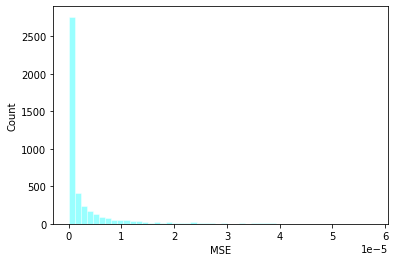

In [50]:
mses.sort()
_, (ax) = plt.subplots(nrows=1)
ax.hist(mses[:-(outlier_count * 2)], bins=50, color='aqua', alpha=.4, edgecolor=(1.0, 1.0, 1.0, 0.1))
plt.xlabel("MSE")
plt.ylabel("Count")
plt.show()


In [55]:
import pickle as pkl
from scripts.generation.matrix_load import construct_generator

generator = construct_generator('cwd/')

f_index_file = open('cwd/feature_index_all.pkl')
label, _ = pkl.load(f_index_file)
f_index_file.close()

for ti, seq in enumerate(their_seqs):
    their_profile = their_data[ti, 3034:]
    oi = np.where(our_seqs == seq)
    if len(oi[0]) == 0:
        continue

    our_profile = our_data[oi[0], 3034:][0]

Found 68943 possible sequences that correspond to a profile
Left with 5257 after 63686 < 10 reads drops
Left with 4854 after 403 < .75 pearson correlation drops


UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 1886: character maps to <undefined>